<a href="https://colab.research.google.com/github/SonakshiA/AlexNet-Implementation/blob/master/AlexNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AlexNet's Architecture:**

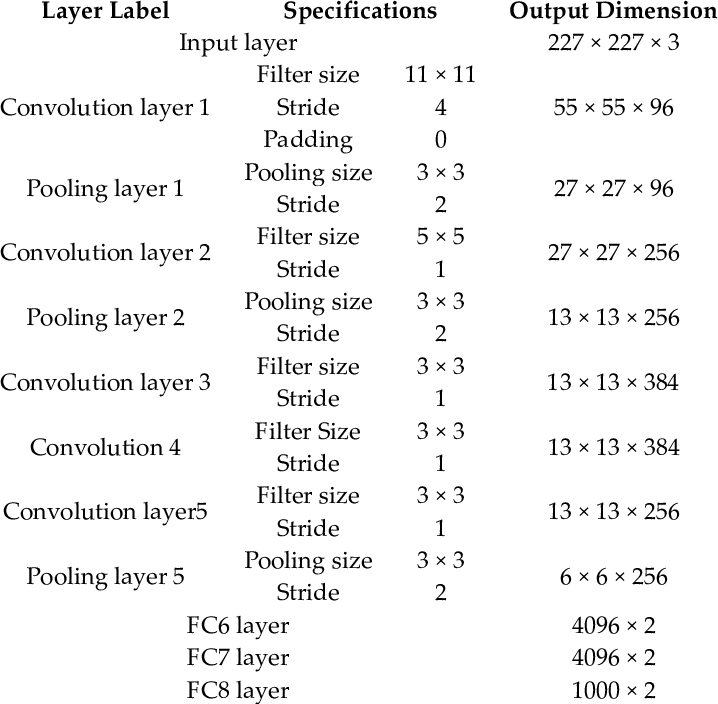

In [4]:
import keras

from keras.models import Sequential #Create a sequential neural network

from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#Dropout is to deactivate a certain percentage of neurons to prevent overfitting

from keras.layers import BatchNormalization #To perform Batch Normalization

import numpy as np

In [5]:
image_shape = (227,227,3)
np.random.seed(1000) #Instantiate an empty model
model = Sequential()

In [6]:
#1st Convolutional layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding='valid',input_shape = image_shape))#When padding == "valid", the input image is not padded
model.add(Activation('relu'))

#Max Pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#2nd Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#Max Pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#3rd Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#5th Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#Max Pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#Passing it to fully-connected layer, we flatten it here!
model.add(Flatten())

#1st Fully Connected layer has 4096 neurons
model.add(Dense(4096,input_shape=(227*277*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4)) #prevent overfitting

#2nd Fully Connected layer has 4096 neurons
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4)) #prevent overfitting

#Output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

model.summary()

#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 9, 9, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,823,912 (109.95 MB)

 Trainable params: 28,823,912 (109.95 MB)

 Non-trainable params: 0 (0.00 B)

**Trainable params**: These will be optimized during training to fit the model to the data.

**Non-trainable params**: These remain constant and are not updated during training.